In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df1 = pd.read_csv(mouse_drug_data_to_load)
df2 = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

df = pd.merge(df2, df1, on="Mouse ID")
# Display the data table for preview

df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = df.groupby(['Drug','Timepoint'])
tumorvolmean = grouped['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumorvolmeandf = pd.DataFrame(tumorvolmean)
# Preview DataFrame
tumorvolmeandf.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvolsem = grouped['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumorvolsemdf = pd.DataFrame(tumorvolsem)
# Preview DataFrame

tumorvolsemdf.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
tumorvolmeandf = tumorvolmeandf.unstack(level = 0)
tumorvolmeandf.columns = tumorvolmeandf.columns.get_level_values(1)
tumorvolmeandf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumorvolsemdf = tumorvolsemdf.unstack(level = 0)
tumorvolsemdf.columns = tumorvolsemdf.columns.get_level_values(1)

# Preview that Reformatting worked
tumorvolsemdf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


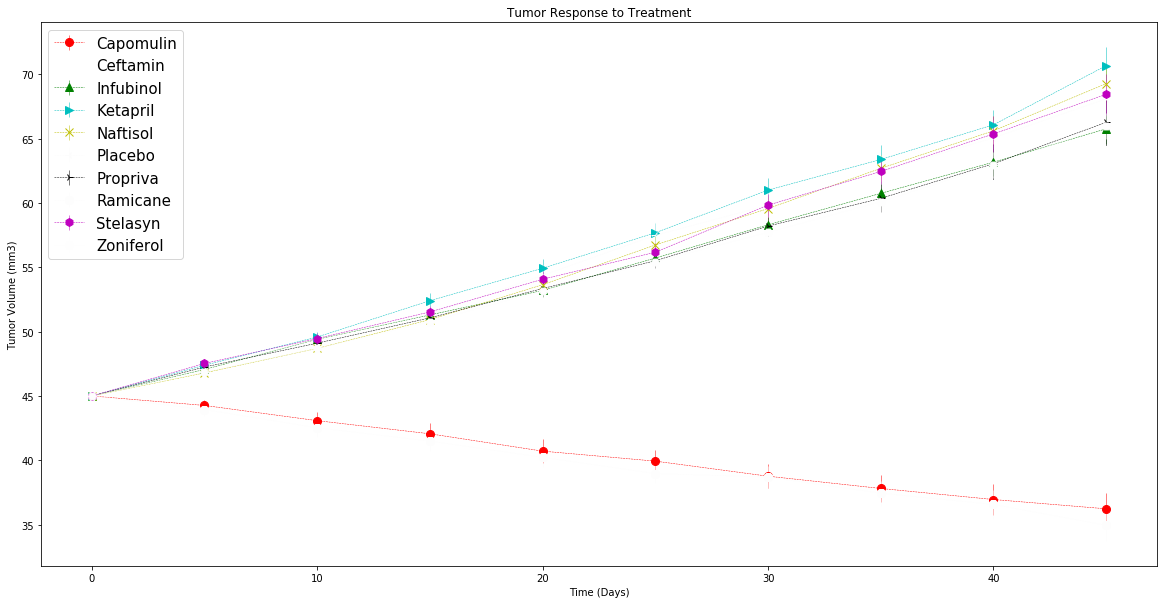

In [71]:
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Capomulin'], yerr=tumorvolsemdf['Capomulin'],
             color='r', marker='o', markersize=8, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Ceftamin'], yerr=tumorvolsemdf['Ceftamin'],
             color='1', marker="v", markersize=8, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Infubinol'], yerr=tumorvolsemdf['Infubinol'],
             color='g', marker='^', markersize=8, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Ketapril'], yerr=tumorvolsemdf['Ketapril'],
             color='c', marker='>', markersize=8, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Naftisol'], yerr=tumorvolsemdf['Naftisol'],
             color='y', marker='x', markersize=8, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Placebo'], yerr=tumorvolsemdf['Placebo'],
             color='4', marker='3', markersize=8, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Propriva'], yerr=tumorvolsemdf['Propriva'],
             color='0', marker='4', markersize=8, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Ramicane'], yerr=tumorvolsemdf['Ramicane'],
             color='3', marker='8', markersize=8, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Stelasyn'], yerr=tumorvolsemdf['Stelasyn'],
             color='m', marker='h', markersize=8, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Zoniferol'], yerr=tumorvolsemdf['Zoniferol'],
             color='2', marker='H', markersize=8, linestyle='--', linewidth=0.5)

x_lim = len(tumorvolmeandf.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(tumorvolmeandf, loc=2, prop={'size': 15})
 
plt.show()

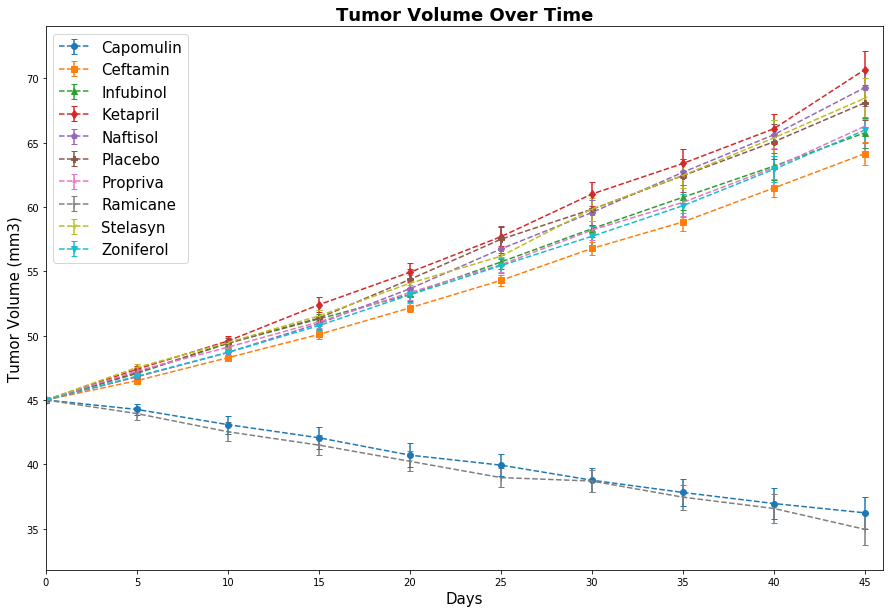

In [72]:
# Generate the Plot (with Error Bars)

plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, tumorvolmeandf.index.max()+3 , 5))
plt.xlim(0, tumorvolmeandf.index.max() + 1)
markers = ['o', 's', '^', 'd', 'p', 'P', '2', '1', '3', "v"]

xvals = tumorvolmeandf.index

count = 0

for c in tumorvolmeandf.columns:
    plt.errorbar(xvals, 
                 tumorvolmeandf[c], 
                 tumorvolsemdf[c], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 capthick = 1, 
                 capsize = 3)  
    count += 1
    

plt.legend(tumorvolmeandf, loc=2, prop={'size': 15})

#plt.show()

# Save the Figure

plt.savefig('tumorvolovertime.png')

No handles with labels found to put in legend.


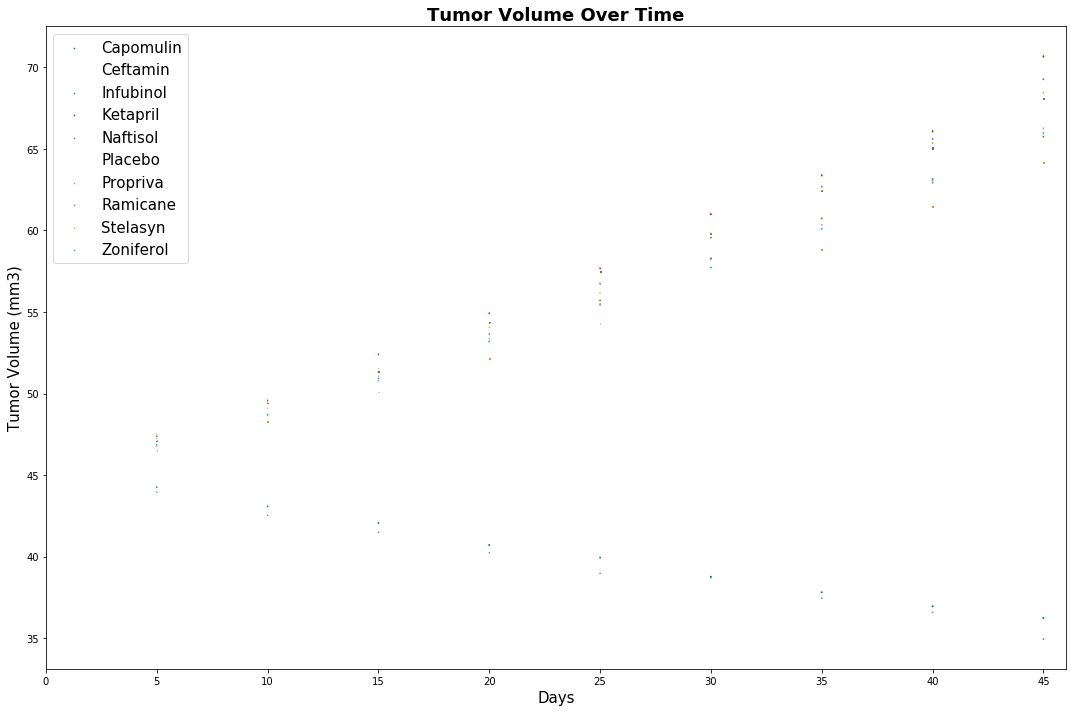

In [73]:
#Scatter Plot
plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, tumorvolmeandf.index.max()+3 , 5))
plt.xlim(0, tumorvolmeandf.index.max() + 1)
markers = ['o', 's', '^', 'd', 'p', 'P', '2', '1', '3', "v"]
count = 0

for c in tumorvolmeandf.columns:
    plt.scatter(xvals, tumorvolmeandf[c], tumorvolsemdf[c], marker =  markers[count])  
    count += 1
    
lg = plt.legend(numpoints = 2, # gives two symbols in legend
                frameon = True,
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)
plt.legend(tumorvolmeandf, loc=2, prop={'size': 15})#plt.show()
plt.tight_layout()
# Save the Figure

plt.savefig('tumorvolovertime.png')

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastaticmean = grouped['Metastatic Sites'].mean()

# Convert to DataFrame
metastaticmeandf = pd.DataFrame(metastaticmean)


# Preview DataFrame
metastaticmeandf

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
metastaticsem = grouped['Metastatic Sites'].sem()

# Convert to DataFrame
metastaticsemdf = pd.DataFrame(metastaticsem)
# Preview DataFrame
metastaticsemdf.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastaticmeandf = metastaticmeandf.unstack(level = 0)
metastaticmeandf.columns = metastaticmeandf.columns.get_level_values(1)

# Preview that Reformatting worked
metastaticmeandf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
metastaticsemdf = metastaticsemdf.unstack(level = 0)
metastaticsemdf.columns = metastaticsemdf.columns.get_level_values(1)


metastaticsemdf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


No handles with labels found to put in legend.


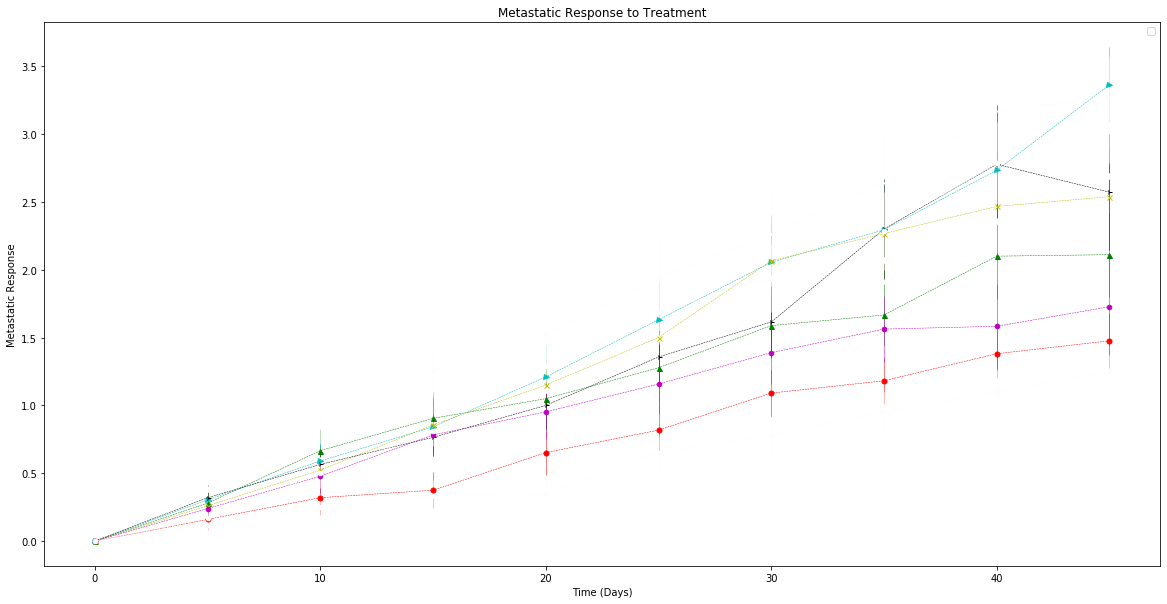

In [56]:
# Generate the Plot (with Error Bars)
plt.errorbar(metastaticmeandf.index, metastaticmeandf['Capomulin'], yerr=metastaticsemdf['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(metastaticmeandf.index, metastaticmeandf['Ceftamin'], yerr=metastaticsemdf['Ceftamin'],
             color='1', marker="v", markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(metastaticmeandf.index, metastaticmeandf['Infubinol'], yerr=metastaticsemdf['Infubinol'],
             color='g', marker='^', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(metastaticmeandf.index, metastaticmeandf['Ketapril'], yerr=metastaticsemdf['Ketapril'],
             color='c', marker='>', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(metastaticmeandf.index, metastaticmeandf['Naftisol'], yerr=metastaticsemdf['Naftisol'],
             color='y', marker='x', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(metastaticmeandf.index, metastaticmeandf['Placebo'], yerr=metastaticsemdf['Placebo'],
             color='4', marker='3', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(metastaticmeandf.index, metastaticmeandf['Propriva'], yerr=metastaticsemdf['Propriva'],
             color='0', marker='4', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(metastaticmeandf.index, metastaticmeandf['Ramicane'], yerr=metastaticsemdf['Ramicane'],
             color='3', marker='8', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(metastaticmeandf.index, metastaticmeandf['Stelasyn'], yerr=metastaticsemdf['Stelasyn'],
             color='m', marker='h', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(metastaticmeandf.index, metastaticmeandf['Zoniferol'], yerr=metastaticsemdf['Zoniferol'],
             color='2', marker='H', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(metastaticmeandf.index)
# Chart title
plt.title("Metastatic Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Metastatic Response")
# legend 
plt.legend(metastaticmeandf, loc=2, prop={'size': 15})plt.show()
# Save the Figure

# Show the Figure


## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mousecount = grouped['Mouse ID'].nunique()


mousecountdf = pd.DataFrame(mousecount)



mousecountdf
# Convert to DataFrame

# Preview DataFrame


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [15]:
# Minor Data Munging to Re-Format the Data Frames
mousecountdf = mousecountdf.unstack(level = 0)
mousecountdf.columns = mousecountdf.columns.get_level_values(1)


mousecountdf
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [16]:
cols =['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
mousecountdf[cols] = mousecountdf[cols].div(mousecountdf[cols].max()).multiply(100)
mousecountdf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


No handles with labels found to put in legend.


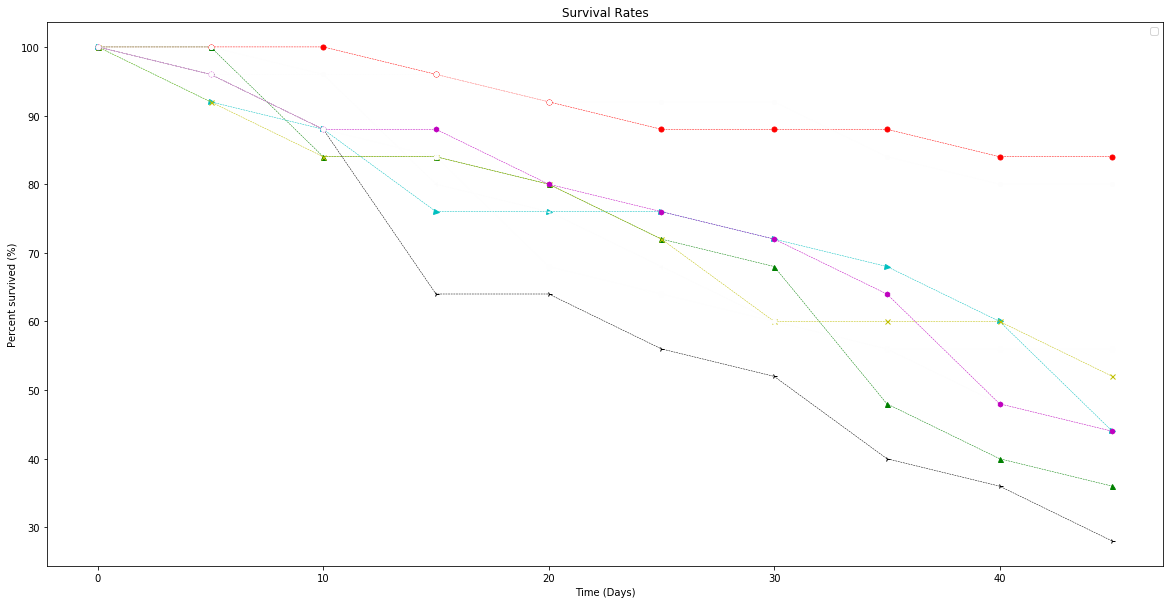

In [57]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(mousecountdf.index, mousecountdf['Capomulin'], color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mousecountdf.index, mousecountdf['Ceftamin'], color='1', marker="v", markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mousecountdf.index, mousecountdf['Infubinol'], color='g', marker='^', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mousecountdf.index, mousecountdf['Ketapril'], color='c', marker='>', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mousecountdf.index, mousecountdf['Naftisol'], color='y', marker='x', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mousecountdf.index, mousecountdf['Placebo'], color='4', marker='3', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mousecountdf.index, mousecountdf['Propriva'], color='0', marker='4', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mousecountdf.index, mousecountdf['Ramicane'], color='3', marker='8', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mousecountdf.index, mousecountdf['Stelasyn'], color='m', marker='h', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(mousecountdf.index, mousecountdf['Zoniferol'], color='2', marker='H', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(metastaticmeandf.index)
# Chart title
plt.title("Survival Rates")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Percent survived (%)")
# legend 
plt.legend()
plt.show()
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
Percentdiff = ((tumorvolmeandf.loc[45,:]-tumorvolmeandf.loc[0,:])/tumorvolmeandf.loc[0,:])*100


# Display the data to confirm
Percentdiff

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [19]:
Drugs = list(Percentdiff.index)
Drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [20]:
percetchanges = list(Percentdiff.values)
percetchanges

[-19.475302667894155,
 42.516491855897414,
 46.12347172785184,
 57.02879468660604,
 53.923347134769195,
 51.29796048315153,
 47.24117486320634,
 -22.32090046276666,
 52.085134287898995,
 46.57975086509522]

In [21]:
colors = ['r' if pc > 0 else 'g' for pc in percetchanges]
colors

['g', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r']

In [22]:
x_axis = np.arange(len(percetchanges))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Current size: [20.0, 10.0]


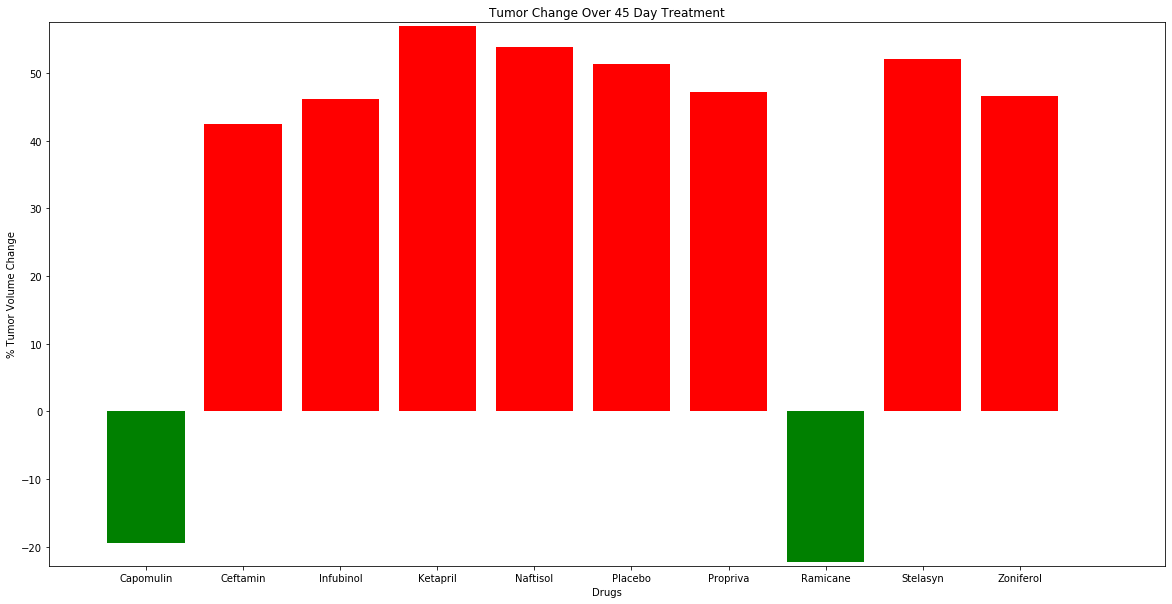

In [29]:
plt.bar(x_axis, percetchanges, color = colors, align="center")
tick_locations = [a for a in x_axis]
plt.xticks(tick_locations, Drugs)
plt.xlim(-1, len(x_axis)+0.5)
plt.ylim(min(percetchanges)-0.5, max(percetchanges)+0.5)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.savefig("TumorChangeOver45DayTreatment.png")
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size